<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone I</font></h2>

<h1><font color="#00586D" size=5>Análisis de datos de Fórmula 1</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Conductores](#section2)
* [3. Carreras](#section3)
* [4. Escuderías](#section4)
* [5. Circuitos](#section5)
* [6. Fernando Alonso vs rivales](#section6)
* [7. Conclusiones y líneas de trabajo para TFM](#section7)

---

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:95%} </style>"))
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

---

<a id="section1"></a>
## <font color="#00586D"> 1. Introducción</font>
<br>

En este primer proyecto del máster se trabajará con información sobre la competición de *Fórmula 1* generada desde el año 1950 hasta esta misma temporada. El conjunto datos se ha descargado de Kaggle [(enlace)](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020), aunque a su vez el autor los recopiló del sitio `ergast.com`, que es una base de datos sobre Fórmula 1 que proporciona una API para la consulta [(enlace)](http://ergast.com/mrd/).

A partir de este conjunto de datos, compuesto por 14 archivos `.csv`, se dará respuesta a una serie de cuestiones generales. También, como objetivo más concreto, se proporcionará una visión sobre la trayectoria (hasta el momento) del piloto español Fernando Alonso en esta competición. 

El enfoque de este trabajo, al igual que del primer módulo en su totalidad, es principalmente ***instrumental***. Por tanto, en lugar de llevar a cabo un análisis exploratorio de los datos como tal (esto lo haremos en el Capstone III), se abordarán una serie de ejercicios cuya resolución implicará manipular distintos *DataFrames*, y permitirá poner en práctica las habilidades adquiridas con *pandas* y *matplotlib*. En concreto, se pondrá el foco en *pandas*, ya que la visualización se trabajará en los módulos correspondientes.

Por último, y debido a que éste es el primero de varios proyectos, **la carga de trabajo es importante**. No obstante, os animamos a ampliar el trabajo y construir alguna gráfica más en relación a algún aspecto que despierte vuestra curiosidad. Además, puesto que **una posible linea de TFM es la elaboración de un portfolio** con ampliación de los trabajos de los distintos módulos, podéis enfocar este trabajo adicional en esa línea.

<div class="alert alert-block alert-info">
    
El texto marcado como <i class="fa fa-info-circle" aria-hidden="true"></i> corresponde a un desplegable con ***sugerencias*** que pueden ayudar a resolver los ejercicios. Os animamos, no obstante,  a hacer un intento de resolverlos antes de leerlas.
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Conductores</font>
<br>

El archivo `data/drivers.csv` contiene información identificativa básica sobre los pilotos. Debido a que el proyecto se centrará también en un piloto concreto, `Fernando Alonso`, se tratará esta información en primer lugar.

### <font size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 1</font>

Cargar los datos del archivo `data/drivers.csv` en un *DataFrame* denominado `df_drivers`, mostrar la cabecera y, posteriormente, la información sobre la estructura del *DataFrame*.
<br><br>


<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Cargar primero el conjunto de datos, sin utilizar ningún parámetro adicional.

</details>   

In [2]:
df_drivers = pd.read_csv('data/drivers.csv')
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
df_drivers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB




En la información del *DataFrame* puede apreciarse que una columna, `driverId`, corresponde al identificador y se ha codificado como entero. El resto, se han codificado como objetos, incluyendo el número (`number`) o la fecha de nacimiento (`dob`). Además, se aprecia que la nacionalidad (`nationality`) podría ser tratada como una categoría. Aunque todos estos cambios se podrían hacer mediante operaciones (`DataFrame.set_index()` y `DataFrame.astype()`), parece más cómodo volver a leer el archivo.



Volver a cargar el archivo `data/drivers.csv` en un *DataFrame* denominado `df_drivers`. Utilizar ahora como índice la primera columna (`driverId`), que contiene el identificador individual de cada piloto.  Especificar que los valores perdidos se representan como `'\N'`, y que el tipo de datos de las columnas `driverRef`, `code`, `forename`, y `surname` debe ser `string`. Especificar también que `nationality` es una categoría, e indicar que se trate la columna `dob` como un dato temporal mediante el parámetro `parse_dates` de `pd.read_csv()`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Se recomienda echar un vistazo a la primera libreta del tutorial de *Pandas*, en la que se vio `pd.read_csv()`.    
* Para especificar el valor `'\N'` puede utilizarse una secuencia de escape o un *raw string*.

</details>   



In [4]:
new_types = {'driverRef': 'string', 'code': 'string', 'forename': 'string', 'surname': 'string', 'nationality': 'category'}

df_drivers = pd.read_csv('data/drivers.csv', index_col='driverId', na_values= r"\N",  dtype = new_types, parse_dates= ['dob'])

df_drivers.head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 1 to 855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverRef    854 non-null    string        
 1   number       51 non-null     float64       
 2   code         97 non-null     string        
 3   forename     854 non-null    string        
 4   surname      854 non-null    string        
 5   dob          854 non-null    datetime64[ns]
 6   nationality  854 non-null    category      
 7   url          854 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1), string(4)
memory usage: 55.6+ KB


Extraer los datos relativos al piloto `Fernando Alonso`, cuyo código es `ALO`, y almacenarlos en una *Series* denominada `alonso_data`.  Almacenar el identificador correspondiente al piloto en la variable `alonso_id`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* El resultado de la selección condicional es un *DataFrame* con una fila. Para convertirlo a *Series* se puede utilizar el método `DataFrame.squeeze()`.
* Por otra parte, el identificador es el nombre (`name`) de la *Series* resultante.

</details>   



In [6]:
alonso_data = df_drivers[df_drivers['code'] == 'ALO'].squeeze() #Con .squeeze se convierte la salida Dataframe en Series
alonso_id = alonso_data.name

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>


### <font  size=3 color=#00586D> <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Ejercicio 2</font>

Mostrar las filas de `df_drivers`correspondientes a los cinco pilotos más jóvenes.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Existen varios métodos para obtener las filas correspondientes a los valores más altos de una columna. Se puede ordenar el *DataFrame* y acceder a las filas por posición, o devolver directamente las *n* filas con mayor valor mediante un método específico.

</details>   

In [7]:
df_drivers.nlargest(5, 'dob')

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
852,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
846,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
855,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


Elaborar, utilizando *matplotlib*, un gráfico de barras que represente el número de pilotos de cada nacionalidad que hay en el *DataFrame* `df_drivers`. Utilizar solamente los datos de las 20 naciones para las que hay más pilotos, añadir el título a la figura, y configurar las etiquetas de la escala del eje X (*ticks*) para que sean legibles.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Este ejercicio se puede hacer de varias formas, pero la más sencilla consiste en obtener el número de veces que aparece cada valor en la columna correspondiente (`nationality`) y tomar los veinte que aparecen de manera más frecuente.
* Existe un método en la API de `Series` que directamente devuelve el número de veces que aparece cada valor.
* En el ejercicio práctico de *pandas* y *matplotlib* se elaboraron varias gráficas de barras.

</details>   

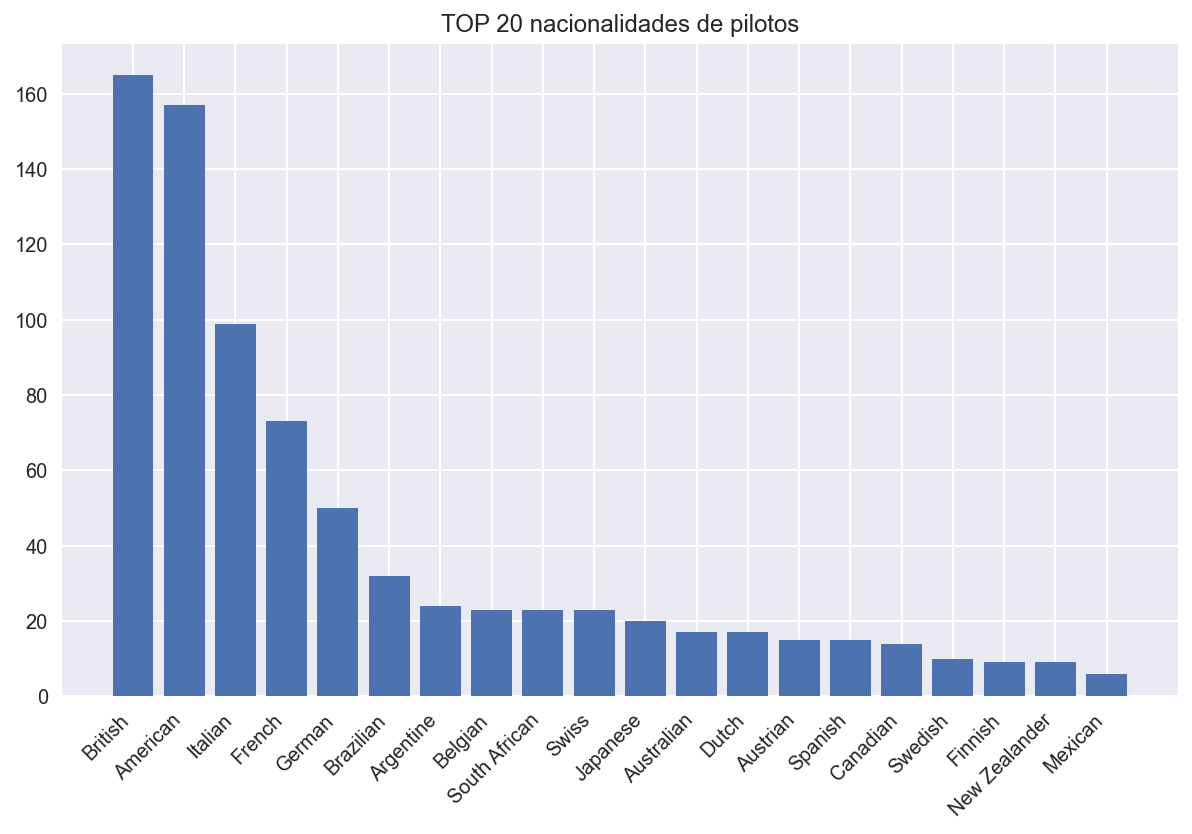

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

s_top20_nat = df_drivers.groupby('nationality').size().nlargest(20)

x = s_top20_nat.index
y = s_top20_nat.values

ax.bar(x, y)
ax.set_title(label = 'TOP 20 nacionalidades de pilotos')
ax.set_xticks(x)
ax.set_xticklabels(labels = x, rotation = 45, ha = 'right'); 

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Carreras</font>
<br>

Una vez obtenidos los datos relativos a pilotos, se trabajará con la fuente de información  más importante en este conjunto de datos: los resultados de las carreras, que están recogidos en el archivo `data/results.csv`. Cada fila contiene información sobre la participación de un piloto (`driverId`) en una carrera (`raceId`). Además de la posición, contiene información relativa a tiempos, vuelta más rápida, mayor velocidad, etc, que también permitirá hacer otros análisis posteriormente.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 3</font>  

El archivo `data/results.csv` contiene los resultados de todas las carreras. Cargar los datos en el *DataFrame* `df_results`. Utilizar la primera columna (`resultId`) como índice. Especificar, igual que anteriormente, que los valores perdidos se representan con `'\N'`. Mostrar la cabecera.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Se recomienda echar un vistazo a la primera libreta, en la que se vió `pd.read_csv()`.    
* Para especificar el valor `'\N'` puede utilizarse una secuencia de escape o un *raw string*.

</details>   

In [9]:
df_results = pd.read_csv('data/results.csv', index_col='resultId', na_values= r"\N")
df_results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


Dibujar un histograma (con *matplotlib*) con el número de carreras (resultados) por piloto. Utilizar 100 intervalos. ¿Qué se aprecia?


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* El método `plt.hist()` / `ax.hist()` acepta un parámetro que determina el número de *bins*.    
</details>   

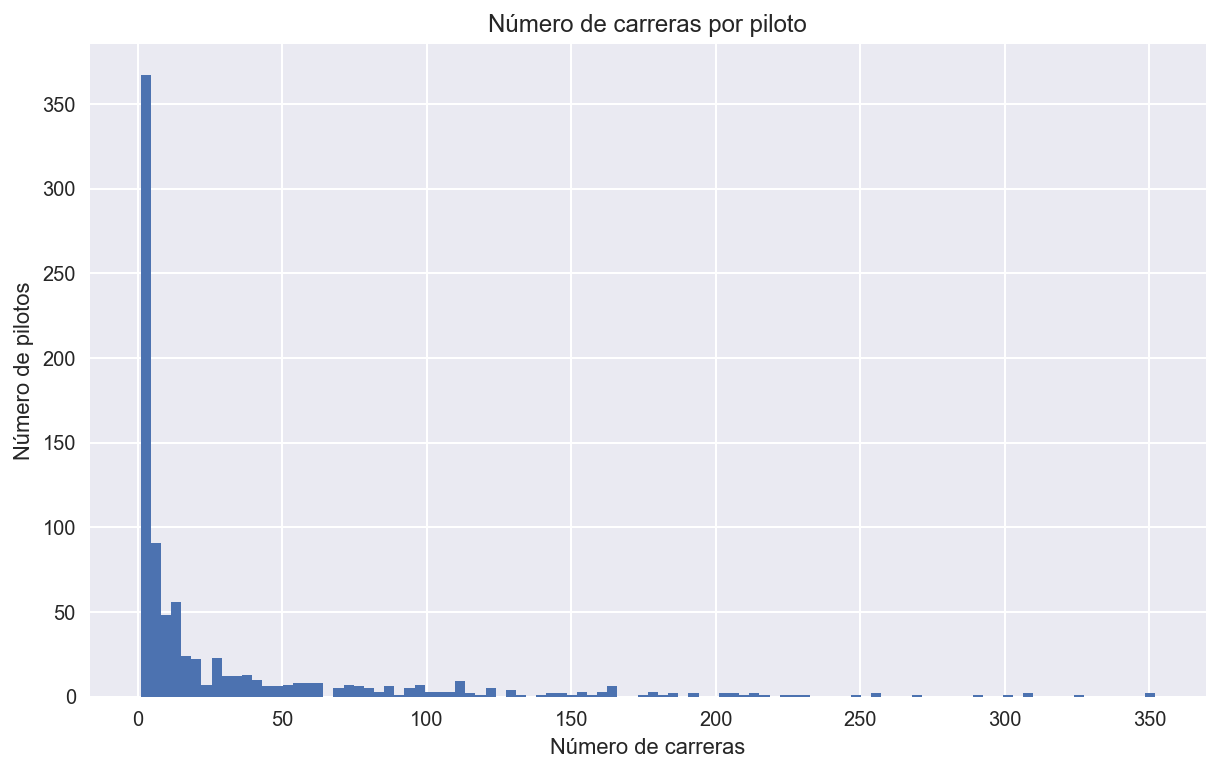

In [10]:
fig, ax = plt.subplots(figsize = (10,6))

s_results = df_results.groupby(['driverId']).size()

x = s_results.values

ax.hist(x, bins = 100);
ax.set_xlabel('Número de carreras')
ax.set_ylabel('Número de pilotos')
ax.set_title('Número de carreras por piloto');

Se puede apreciar como un gran número de pilotos (350) han corrido menos de 4 carreras. Casi todos los pilotos han corrido menos de 20 carreras. Es díficil encontrar pilotos que hayan corrido un mayor número de carreras

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 4</font>  

El conjunto de datos `data/races.csv` contiene información relativa a cada una de las carreras. Almacenarlo en un *DataFrame* denominado `df_races`, utilizando la columna `raceId` (la primera) como índice. Especificar que el campo `date` ha de considerarse como una fecha. Utilizar para ello el parámetro `parse_dates`. Inspeccionar el *DataFrame*.

In [11]:
df_races = pd.read_csv('data/races.csv', index_col='raceId', na_values= r"\N", parse_dates=['date'])
df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 1 to 1096
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         1079 non-null   int64         
 1   round        1079 non-null   int64         
 2   circuitId    1079 non-null   int64         
 3   name         1079 non-null   object        
 4   date         1079 non-null   datetime64[ns]
 5   time         348 non-null    object        
 6   url          1079 non-null   object        
 7   fp1_date     44 non-null     object        
 8   fp1_time     22 non-null     object        
 9   fp2_date     44 non-null     object        
 10  fp2_time     22 non-null     object        
 11  fp3_date     38 non-null     object        
 12  fp3_time     19 non-null     object        
 13  quali_date   44 non-null     object        
 14  quali_time   22 non-null     object        
 15  sprint_date  6 non-null      object        
 16  sprint

Al inspeccionar el *DataFrame* se observa que la columna `time` está expresada como una cadena de texto. Generar una nueva *Series* con los valores de la columna `time` convertidos a marcas de tiempo.  ¿Qué se aprecia?


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Utilizar `pd.to_datetime()`.    
</details>  

In [13]:
s_races_time = pd.to_datetime(df_races['time'])
s_races_time

raceId
1      2022-11-27 06:00:00
2      2022-11-27 09:00:00
3      2022-11-27 07:00:00
4      2022-11-27 12:00:00
5      2022-11-27 12:00:00
               ...        
1092   2022-11-27 05:00:00
1093   2022-11-27 19:00:00
1094   2022-11-27 20:00:00
1095   2022-11-27 18:00:00
1096   2022-11-27 13:00:00
Name: time, Length: 1079, dtype: datetime64[ns]

Los valores de tiempo utilizan como fecha la fecha del día actual. En la siguiente celda se obtiene la fecha actual como Timestamp

In [14]:
today_date = pd.to_datetime(pd.to_datetime('today').date())

Crear una columna denominada `df_races[date time]` en la que se represente la fecha y hora en la que tuvo lugar cada carrera. Para ello, es necesario convertir a `TimeDelta` el contenido de la columna `time`, y sumárselo a la columna `date`.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* La conversión a `TimeDelta` se hace con `pd.to_timedelta()`.  
</details>  

In [15]:
df_races['date time'] = pd.to_timedelta(s_races_time - today_date) + df_races['date']
df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,date time
raceId,,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-29 06:00:00
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-05 09:00:00
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-19 07:00:00
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 12:00:00
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-10 12:00:00


Eliminar las columnas `date` y `time`. También las relativas a las horas de entrenamiento libres (`fpx_`), calificaciones (`qualy_`) y sprints (`sprint_`). Mover la nueva columna, `date time`, a la posición que ocupaba `date`. Es decir, el *DataFrame* resultante debe tener 5 columnas: `year`, `round`, `circuitId`, `date time` y `url`.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* En este caso, lo más sencillo para hacerlo es seleccionar las columnas de interés en el orden que se pide.
</details>  

In [16]:
df_races = df_races[['year', 'round', 'circuitId', 'date time', 'url']]
df_races.head()

,year,round,circuitId,date time,url
raceId,,,,,
1,2009,1,1,2009-03-29 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,2009-04-05 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,2009-04-19 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,2009-04-26 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,2009-05-10 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 5</font>  

Crear una figura con dos gráficos de barras. En el de la izquierda se han de mostrar las carreras que han tenido lugar en cada mes del año. En el de la derecha, las que han tenido lugar en cada hora. Ambas gráficas deben compartir la escala en el eje *y*.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Por comodidad se pueden obtener, como paso previo a la creación de cada gráfica, dos *Series* intermedias denominadas `races_month` y `races_hour`. 
* También es importante tener en cuenta que tanto el mes como la hora son accesibles a través `df_races['date time'].dt`.
* Se ha de crear una figura con dos gráficas mediante `plt.subplots()`.
* En la última sesión de ejercicios de *pandas* y *matplotlib* se vieron gráficas parecidas.
</details>  

In [17]:
races_month = df_races.groupby(df_races['date time'].dt.month).size()
races_hour = df_races.groupby(df_races['date time'].dt.hour).size()

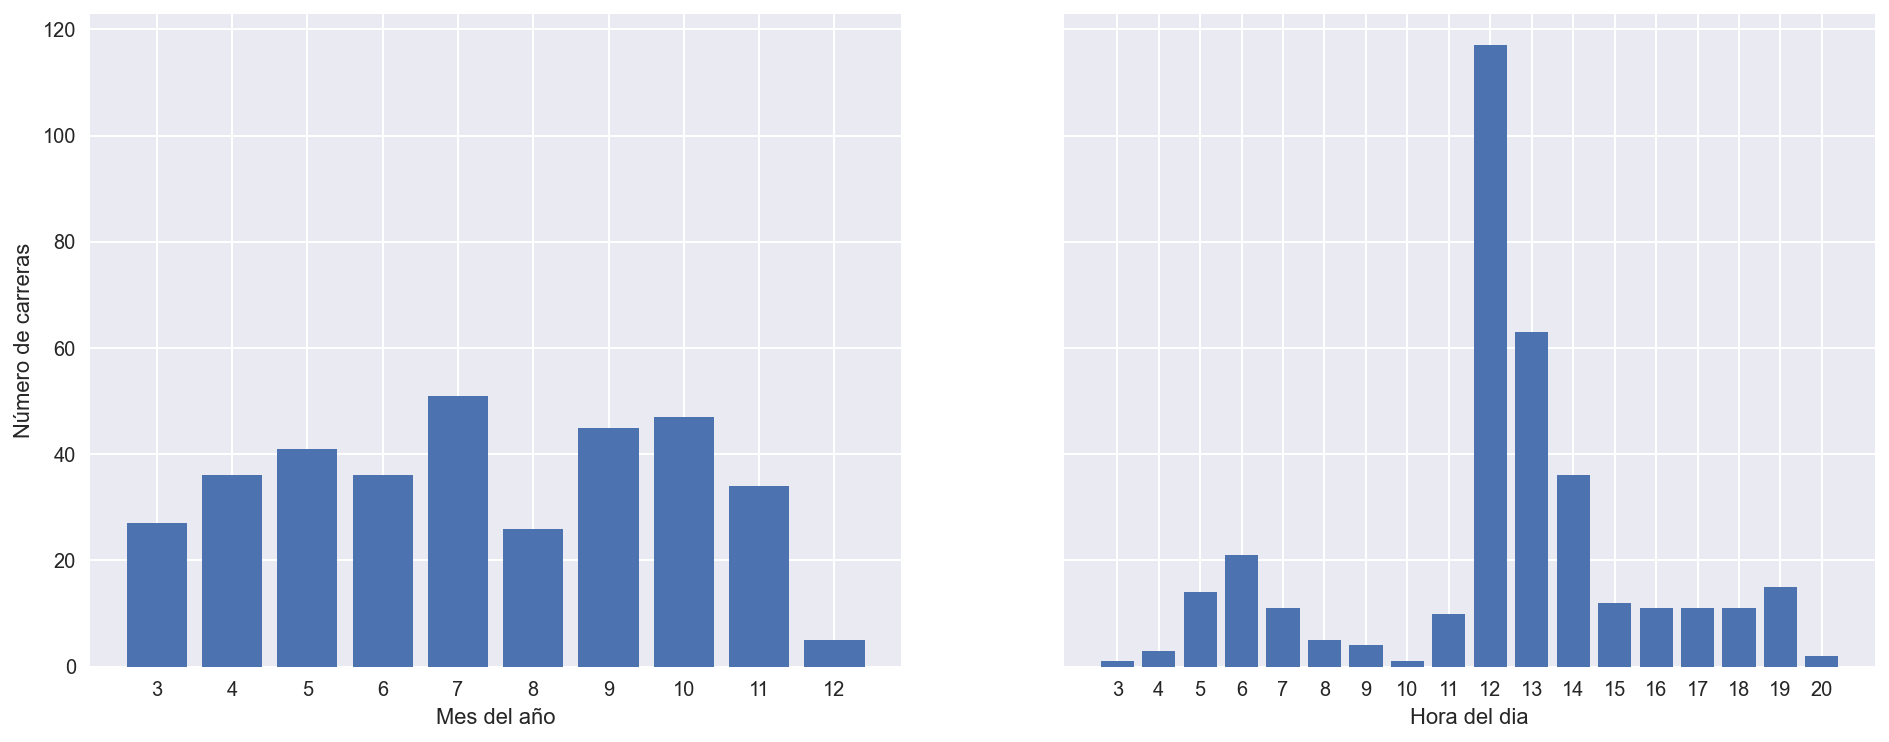

In [18]:
fig, ax = plt.subplots(1,2, figsize = (16,6), sharey=True)

x0 = races_month.index
y0 = races_month.values

x1 = races_hour.index
y1 = races_hour.values

ax[0].bar(x0, y0)
ax[0].set_xticks(x0);
ax[0].set_xlabel('Mes del año')
ax[0].set_ylabel('Número de carreras')

ax[1].bar(x1, y1)
ax[1].set_xticks(x1)
ax[1].set_xlabel('Hora del dia');

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 6</font>  

La columna `statusId` de `df_results` contiene un código numérico que representa el estado en que cada coche/piloto concluyó cada carrera. El conjunto de datos `data/status.csv` contiene la descripción del estado. Leer este archivo y almacenarlo en el *DataFrame*. `df_status`.

In [19]:
df_status = pd.read_csv('data/status.csv')
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Utilizar ambos *DataFrames*, `df_results` y `df_status`, para elaborar un diagrama de sectores en el que se visualicen las 10 causas más frecuentes que han impedido terminar a los pilotos las carreras. Utilizar un tamaño de figura $6 \times 6$.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Hay que obtener el número de veces que aparece cada estado de terminación dentro del *DataFrame* `df_results` y obtener los once más frecuentes. Por otra parte, el estado 1 representa la finalización, por lo que hay que descartarlo. El resultado se puede almacenar en una serie denominada `causes`.
* Para elaborar la gráfica hay que obtener los nombres de los estados a partir de los códigos obtenidos y desde el DataFrame `df_status` y utilizarlos como etiqueta.
* Los diagramas de sectores se hacen con `plt.pie()` / `ax.pie()`. Podéis consultar la API [**(+inf)**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) o ejemplos [**(+inf)**](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py).
</details>  



In [20]:
causes = df_results.groupby('statusId').size().nlargest(11).iloc[1:11]

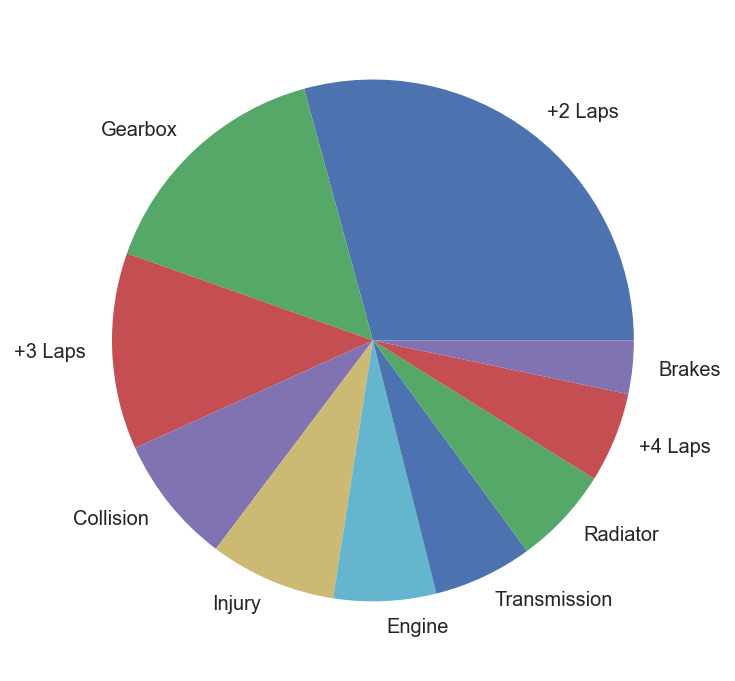

In [21]:
fig, ax = plt.subplots(figsize = (6,6))

x = causes.values
status_labels = [df_status['status'].loc[status] for status in causes.index]

ax.pie(x, labels = status_labels);

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 7</font>


Mostrar el nombre, apellido, nacionalidad y número de victorias de los cinco pilotos que acumulan más victorias.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
Este ejercicio se puede resolver en varios pasos.
    
1. La victoria se representa con el  valor 1 en la columna `position`. Se han de seleccionar los resultados correspondientes a victorias y almacenarlos en un nuevo *DataFrame*.
2. Sobre el *DataFrame* anterior, agrupar por conductor, calcular el tamaño de cada grupo y devolver los 5 mayores grupos y su tamaño. Como se opera sobre una *Series*, el resultado es otra *Series* que se puede convertir en *DataFrame* mediante `Series.to_frame()`. En ese *DataFrame* resultante se puede renombrar la única existente a `wins`.
3. Se debe hacer un `pd.merge()` entre el *DataFrame* obtenido y `df_drivers`.En todos las operaciones de fusión se ha de tener en cuenta qué índices se incluyen en el *DataFrame* resultante.
4. Por último, se accede a las columnas de interés: nombre y apellido del piloto, nacionalidad, y victorias.    
    
</details>  


In [22]:
df_results_victorias = df_results[df_results['positionOrder'] == 1]
df_top5_pilotos = df_results_victorias.groupby('driverId').size().nlargest(5).to_frame()
df_top5_pilotos = df_top5_pilotos.rename(columns = {0: 'wins'})
df_top5_pilotos

,wins
driverId,
1,103
30,91
20,53
117,51
102,41


In [23]:
df_top5_pilotos = pd.merge(df_top5_pilotos, df_drivers, how='inner', left_index=True, right_index=True)  

In [24]:
df_top5_pilotos[['forename', 'surname', 'nationality', 'wins' ]]

,forename,surname,nationality,wins
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,91
20,Sebastian,Vettel,German,53
117,Alain,Prost,French,51
102,Ayrton,Senna,Brazilian,41


Mostrar el nombre, apellido, nacionalidad y número *pole positions* de los cinco pilotos que acumulan más sesiones de calificación han ganado. La posición de un piloto en la calificación de cada carrera viene dada por la columna `grid`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Este ejercicio es similar al anterior, pero en este caso hay que acceder a las filas correspondientes a las calificaciones (`grid`), y el *DataFrame* debe incluir una columna denominada `poles` en lugar de `wins`.  
* Se valorará adicionalmente el resolver el ejercicio mediante *method chaining*, sin crear estructuras de datos intermedias.
    
</details>  


In [25]:
((df_results[df_results['grid'] == 1]
 .groupby('driverId')
 .size()
 .nlargest(5)
 .to_frame()
 .rename(columns = {0: 'poles'}))
 .merge(df_drivers, how='inner', left_index=True, right_index=True))[['forename', 'surname', 'nationality', 'poles' ]]

,forename,surname,nationality,poles
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,68
102,Ayrton,Senna,Brazilian,65
20,Sebastian,Vettel,German,57
373,Jim,Clark,British,34


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 8</font>


Cuando el análisis de datos se centra en una categoría o subconjunto de datos obtenidos mediante selección condicional, puede resultar cómodo almacenar este resultado intermedio en un *DataFrame*. Además, si no se va a escribir sobre él, no es necesario hacer copia, sino que se puede hacer una asignación (Anexo I del tutorial). Almacenar los resultados correspondientes a carreras terminadas por `Fernando Alonso` en un *DataFrame* denominado `df_results_alo`. Mostrar cuántas son.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
       
* Se trata de hacer selección condicional y seleccionar los resultados que cumplan ambas condiciones: que el piloto sea `Fernando Alonso`y que haya concluido la carrera.
* La columna `statusId` contiene información sobre la situación de un piloto/coche al final de la carrera, y el valor 1 quiere decir que terminó.  
    
</details>  


In [26]:
df_results_all = pd.merge(df_drivers, df_results, how='inner', left_index=True, right_on='driverId')

In [27]:
df_results_alo = df_results_all[(df_results_all['statusId'] == 1) & (df_results_all['forename'] == 'Fernando') & (df_results_all['surname'] == 'Alonso')]
print('Número de carreras terminadas: ', len(df_results_alo))

Número de carreras terminadas:  220


La columna `position` del *DataFrame* `df_results` (y de `df_results_alo`) contiene la posición en la que un conductor quedó en la carrera correspondiente. Obtener el número de podios (posiciones primera, segunda y tercera) que hizo `Fernando Alonso` a lo largo de su trayectoria deportiva (hasta el momento).


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* La API de *Series* proporciona un método para obtener las veces que aparece cada valor. 
* El resultado es a su vez una *Serie* que, por tanto, se puede ordenar tanto por valor como por índice.
    
</details> 

In [28]:
df_results_alo['position'].value_counts().sort_index()[1:3]

1.0    32
2.0    37
3.0    29
Name: position, dtype: int64

Mostrar el número de ocasiones en las que `Fernando Alonso` ocupó las posiciones uno a cuatro en la salida (primera y segunda líneas).

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* Se trata de obtener las filas en las que el valor `grid` está entre 1 y 4.    
</details> 

In [29]:
df_results_alo['grid'].value_counts().sort_index()[0:4]

1    21
2    13
3    25
4    21
Name: grid, dtype: int64

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 9</font>

Debido a la importancia de los coches, uno de los factores que permiten calificar la actuación de un piloto es las posiciones que gana o pierde con respecto a la posición de partida. Calcular este resultado para cada piloto/carrera, y dibujar un histograma con la distribución de valores, pero solamente para los pilotos *que acabaron cada carrera*. ¿Qué lectura podría hacerse del histograma?

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* Hay que considerar que, si un coche califica (`grid`) 5º y termina la carrera (`position`) 3º, ha ganado dos posiciones. En este ejercicio se trata de crear una columna y hacer el histograma con ella.
* Se puede crear una columna con las posiciones ganadas, seleccionar filas que tengan el valor `status_Id==1` en el nuevo *DataFrame*, y acceder a la nueva columna.
* Utilizando `DataFrame.assign()` se puede resolver el ejercicio sin recurrir explícitamente a estructuras intermedias.
    
</details> 

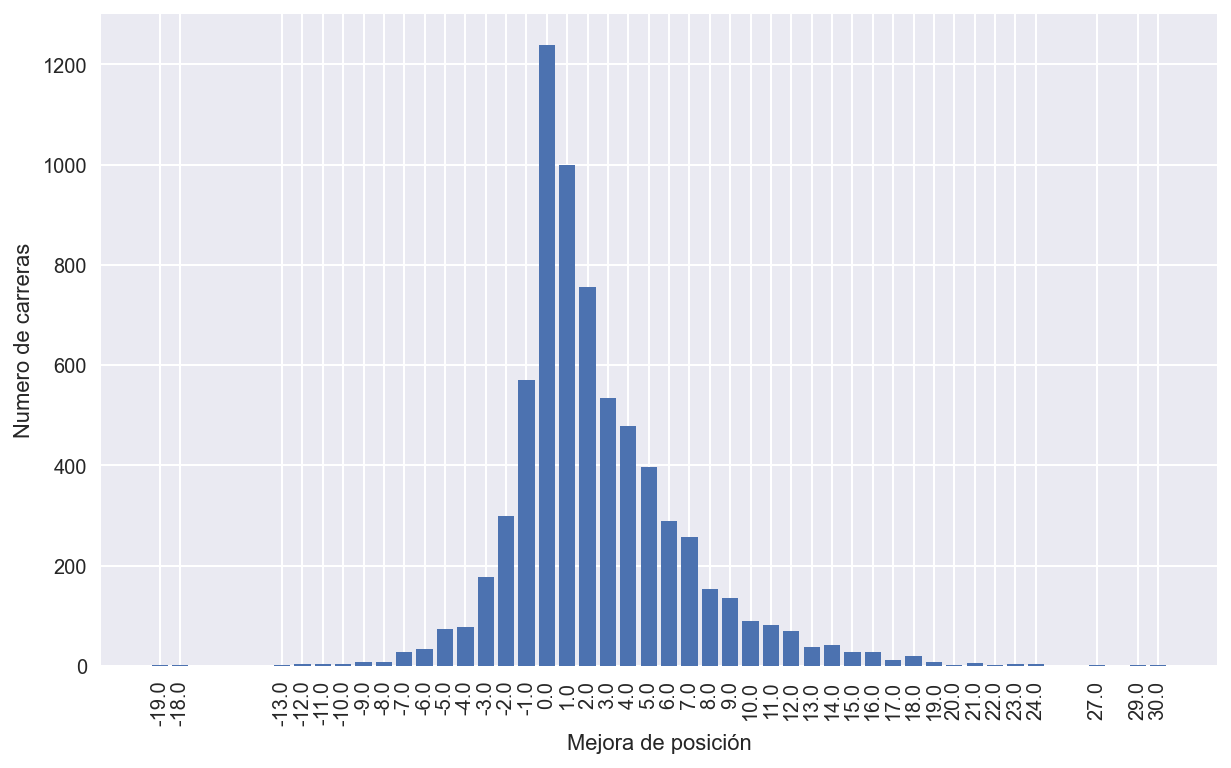

In [30]:
dist_Delta_pos = df_results.assign(Delta_pos = df_results['grid'] - df_results['position'])[df_results['statusId'] == 1].groupby('Delta_pos').size()

x = dist_Delta_pos.index
y = dist_Delta_pos.values

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(labels = x, rotation = 90)
ax.set_xlabel('Mejora de posición')
ax.set_ylabel('Numero de carreras');

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 10</font>

Calcular las posiciones que, de media, han ganado los pilotos **en las carreras finalizadas**. Mostrar el resultado para los cinco pilotos que más destacan en este aspecto, junto a su nombre, apellidos y nacionalidad.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Este ejercicio **es  difícil**. 
</div>


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Al igual que en el ejercicio anterior, crear una nuevo `DataFrame` que incorpore una columna denominada `pos_won` obtenida al operar con las columnas `grid` y `position`, y a partir de los resultados correspondientes a carreras terminadas (en los que `statusId==1`). Se puede hacer creando la nueva columna, o un nuevo *DataFrame* mediante `DataFrame.assign()`.
    
* El *DataFrame* resultante se ha de agrupar por piloto, se ha de obtener la media de la columna `pos_won` y seleccionar los cinco mayores valores. Como el resultado es una *Series*, se debe convertir a *DataFrame* con `Series.to_frame()`. También se puede generar directamente un *DataFrame* accediendo a la columna mediante una lista de un elemento.
    
* El resultado se ha de fundir con la `df_drivers`. Es importante gestionar bien cómo (`how`).
    
* Por último, devolver las columas `forename`, `surname`, `nationality` y `pos_won` del resultado de la fusión.
    
* Este ejercicio se puede hacer de forma elegante, sin crear explícitamente estructuras intermedias, mediante *method chaining*, aunque recomendamos encarecidamente dejar esto para el final, cuando se tenga el Capstone resuelto.
    
</details> 

In [31]:
df_results_pos_won = ((df_results.assign(pos_won = df_results['grid'] - df_results['position'])[df_results['statusId'] == 1]
                       .groupby('driverId')
                       .mean()
                       .nlargest(5, 'pos_won')))


(pd.merge(df_drivers, df_results_pos_won, how='inner', left_index=True, right_on='driverId')
 .sort_values(by='pos_won', ascending = False)[['forename', 'surname', 'nationality', 'pos_won']])

,forename,surname,nationality,pos_won
driverId,,,,
659,Jerry,Hoyt,American,24.0
734,Bobby,Ball,American,24.0
560,Bill,Cheesbourg,American,23.0
591,George,Amick,American,23.0
613,Marshall,Teague,American,21.0


¿Cuantas carreras ha disputado y concluido el piloto más destacado en este aspecto?

In [32]:
len(df_results[(df_results['driverId']==659) & (df_results['statusId']==1)])

1

Puede apreciarse que la información está viciada porque incluye a pilotos que han competido muy pocas veces y les ha ido muy bien. Repetir el ejercicio anterior, pero utilizando solamente datos de aquellos pilotos que han finalizado al menos 75 carreras.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Este ejercicio es similar al anterior, pero hay que incorporar un paso intermedio. Una vez obtenidas las posiciones ganadas a partir de `df_results`, computando la diferencia entre `grid` y `posición` en todos los resultados correspondientes a carreras terminadas (`statusId==1`), hay que filtrar los resultados correspondientes a los pilotos que han concluido 75 carreras o más. Para ello, se ha de utilizar `DataFrame.groupby().filter()`.
    
* A pesar de la complejidad, también se puede hacer este ejercicio mediante *method chaining*.
    
    
</details> 


In [33]:
df_results_pos_won = (df_results.assign(pos_won = df_results['grid'] - df_results['position'])[df_results['statusId'] == 1]
 .groupby('driverId')
 .filter(lambda df_group: len(df_group)>75)
 .groupby('driverId')
 .mean()
 .nlargest(5, 'pos_won'))

(pd.merge(df_drivers, df_results_pos_won, how='inner', left_index=True, right_on='driverId')
 .sort_values(by='pos_won', ascending = False)[['forename', 'surname', 'nationality', 'pos_won']])

,forename,surname,nationality,pos_won
driverId,,,,
21,Giancarlo,Fisichella,Italian,2.807229
137,Nelson,Piquet,Brazilian,2.465116
815,Sergio,Pérez,Mexican,2.174603
18,Jenson,Button,British,2.149068
817,Daniel,Ricciardo,Australian,1.977612


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Escuderías</font>
<br>

El elemento fundamental en Fórmula 1 es el coche. La diferencia entre unos equipos y otros es tan alta que, para muchos, es una competición entre escuderías. 

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 11</font>

Leer los datos de las escudarías, almacenadas en el archivo `data/constructors.csv` y almacenarlos en un *DataFrame* denominado `df_constructors`. Utilizar la primera columna como índice.

In [34]:
df_constructors = pd.read_csv('data/constructors.csv', index_col = 0)

df_constructors.head()

,constructorRef,name,nationality,url
constructorId,,,,
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


Mostrar los nombres y nacionalidades de los cinco constructores que han ganado más carreras a lo largo de la historia de la competición.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
      
* Hay que acceder a los resultados correspondientes a victorias, es decir, donde `position==1`.
    
* Extraer las victorias por constructor agrupando por `constructorId`, calculando el número de elementos por grupo, y generando con el resultado un nuevo *DataFrame*. Renombrar la columna correspondiente a `wins`.
    
* Fundir el resultado con `df_constructors`, que contiene los datos de cada constructor.
 
* Mostrar las columnas `name`, `nationality` y `wins` del *DataFrame* resultante.
    
    
</details> 


In [35]:
(df_results[df_results['position']==1]
 .groupby('constructorId')
 .size()
 .to_frame()
 .rename(columns = {0:'wins'})
 .merge(df_constructors,  how='inner', left_index=True, right_on='constructorId')
 .nlargest(5, 'wins')[['name', 'nationality', 'wins']]
)

,name,nationality,wins
constructorId,,,
6,Ferrari,Italian,243
1,McLaren,British,179
131,Mercedes,German,124
3,Williams,British,114
9,Red Bull,Austrian,84


Mostrar los puntos (columna `points`) que ganó `Fernando Alonso` con cada constructor, dando además el nombre y la nacionalidad del constructor.


<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Se trata de agrupar el *DataFrame* `df_results_alo` en función del constructor, y sumar los puntos (`points`) por cada grupo. 
    
* El resultado, representado como un *DataFrame*, se puede fundir con `df_constructors` para mostrar además el nombre del constructor y la nacionalidad.
    
    
</details> 


In [36]:
(df_results_alo
 .groupby('constructorId')
 .sum()
 .merge(df_constructors, how = 'inner', left_index = True, right_index= True)[['name', 'nationality', 'points']]
 .sort_values('points', ascending=False))

,name,nationality,points
constructorId,,,
6,Ferrari,Italian,1180.0
4,Renault,French,464.0
1,McLaren,British,205.0
214,Alpine F1 Team,French,100.0


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Circuitos</font>
<br>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 12</font>

Por otra parte, el archivo `data/circuits.csv` contiene información relativa a cada uno de los circuitos. Leerlo y almacenarlo en el *DataFrame* `df_circuits`, utilizando la primera columna, `circuitId` como índice.

In [37]:
df_circuits = pd.read_csv('data/circuits.csv', index_col = 0)
df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


Mostrar los 5 circuitos más rápidos, entendiendo como tales aquellos para los que la media de las 100 vueltas más rápidas (cien valores más altos de `fastestLapSpeed`) es más alta.

**Nota:** Obviamente, este criterio es mejorable. Pero es un ejemplo. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Este ejercicio **es el más difícil**. Quizá se puede dejar para el final.
</div>


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
Este ejercicio se puede resolver en varios pasos, y tiene similitudes con los anteriores.
* En primer lugar, se pueden fundir los *DataFrames* `df_results` y `df_races` para poder asociar resultados con circuitos. Siempre es importante indicar de manera explícita qué índices queremos que tenga el conjunto resultante.
* Hay que agrupar el resultado por circuito (`circuitId`) y obtener el resultado para cada grupo.
* Para obtener parte de la información requerida, se puede utilizar `DataFrame.groupby().apply()`. La función pasada a `apply` toma como argumento un *DataFrame*, y devuelve la media de los 100 valores más altos para `fastestLapSpeed`. Al utilizar esta función con `DataFrame.groupby.apply()` devuelve esa información para cada grupo.
* Una vez devuelta la información para cada circuito, se pueden tomar los 5 valores más altos.
* Por último, el resultado se puede convertir a *DataFrame* y se puede hacer un merge con `df_circuits` para mostrar todos los datos de los circuitos.
    
</details> 


In [38]:
((df_results.merge(df_races, how = 'inner', left_on = 'raceId', right_index = True)
  .groupby('circuitId')
  .apply(lambda df_group: df_group
         .nlargest(100, 'fastestLapSpeed')
         .mean(numeric_only=True))
  .nlargest(5, 'fastestLapSpeed'))
 .merge(df_circuits, how = 'inner', left_index = True, right_index = True,))[['name', 'country', 'fastestLapSpeed']]

,name,country,fastestLapSpeed
circuitId,,,
14,Autodromo Nazionale di Monza,Italy,249.98647
77,Jeddah Corniche Circuit,Saudi Arabia,238.65150
9,Silverstone Circuit,UK,234.17830
13,Circuit de Spa-Francorchamps,Belgium,233.47847
70,Red Bull Ring,Austria,228.07410


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 13</font>

Calcular el resultado anterior (los circuitos más rápidos) con los datos relativos a `Fernando Alonso`, almacenados en `df_results_alo`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Solo hay que cambiar el *DataFrame* de partida, que ahora es `df_results_alo`.
    
</details> 

In [39]:
((df_results_alo.merge(df_races, how = 'inner', left_on = 'raceId', right_index = True)
  .groupby('circuitId')
  .apply(lambda df_group: df_group
         .nlargest(100, 'fastestLapSpeed')
         .mean(numeric_only=True))
  .nlargest(5, 'fastestLapSpeed'))
 .merge(df_circuits, how = 'inner', left_index = True, right_index = True,))[['name', 'country', 'fastestLapSpeed']]

,name,country,fastestLapSpeed
circuitId,,,
14,Autodromo Nazionale di Monza,Italy,243.132556
9,Silverstone Circuit,UK,226.850250
13,Circuit de Spa-Francorchamps,Belgium,225.016143
78,Losail International Circuit,Qatar,223.437000
22,Suzuka Circuit,Japan,222.162714


Calcular también en qué circuitos obtuvo `Fernando Alonso`, de media, mejor posición.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Se trata de fundir los resultados de alonso con `df_races` para disponer del circuito al que corresponde cada carrera (similar al anterior).
* Después se agrupa el *DataFrame* resultante por `circuitId`, se obtiene la posición media, y se devuelven los cinco valores más pequeños.
* Por último, el resultado se puede fundir con `df_circuits` para que se muestren los datos de los circuitos.
    
</details> 

In [40]:
((df_results_alo
  .merge(df_races, how = 'inner', left_on = 'raceId', right_index = True)
  .groupby('circuitId')
  .mean()
  .nsmallest(5, 'position'))
 .merge(df_circuits, how = 'inner', left_index = True, right_index = True,))[['name', 'country', 'position']]

,name,country,position
circuitId,,,
16,Fuji Speedway,Japan,1.000000
4,Circuit de Barcelona-Catalunya,Spain,2.800000
78,Losail International Circuit,Qatar,3.000000
14,Autodromo Nazionale di Monza,Italy,3.222222
20,Nürburgring,Germany,3.250000


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

**Opcional:** Mostar todos los circuitos en un mapa con `folium`. En la libreta de ejercicios con *matplotlib* tenéis un ejemplo de cómo se hace.

In [41]:
import folium

# Diferentes mapas
tiles = 'Stamen Toner'
tiles = 'OpenStreetMap'

europe_figure = folium.Figure(width=600, height=600)
europe_map = folium.Map(location=[50, 0], tiles=tiles, zoom_start=4).add_to(europe_figure)

tiles = folium.TileLayer(
         tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True).add_to(europe_map)

for name,circuit in df_circuits.iterrows():
    folium.Marker([circuit['lat'], circuit['lng']], popup=circuit['name']).add_to(europe_map)
    
europe_figure

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Alonso vs rivales</font>
<br>

En esta parte del proyecto se valorarán los resultados de `Fernando Alonso` con respecto a sus rivales, es decir, con respecto a los pilotos que compitieron en las mismas carreras que él. Esto requiere manipular los datos, ya que la información no se puede obtener de forma directa.



---

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 14</font>
Mostrar los rivales (filas completas) contra los que ha competido Fernando Alonso.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
Anteriormente se filtraron los resultados de las carreras que terminó `Fernando Alonso`, y se almacenaron en `df_results_alo`. Se trata de:
* Seleccionar los datos correspondientes a esas carreras. 
* Acceder a los resultados (pilotos) que compitieron en ellas (y que no sean `Fernando Alonso`). Para ello es muy útil utilizar `Series.isin()`. Obtener los identificadores únicos de los pilotos.
* Por último, seleccionar los datos de estos pilotos en `df_drivers`.
    
</details> 


In [42]:
df_drivers.loc[(df_results
 .loc[df_results['raceId'].isin(df_results_alo['raceId'].values), 'driverId']
 .drop(4)
 .drop_duplicates()
 .values)]

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
...,...,...,...,...,...,...,...,...
853,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
847,russell,63.0,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
849,latifi,6.0,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi


Obtener los datos de los 10 rivales a los que más veces se ha enfrentado `Fernando Alonso`, y almacenarlos en el *DataFrame* `df_fa_vs`.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Seleccionar los resultados (de `df_results`) correspondientes a las carreras en las que compitió `Fernando Alonso`, y que no corresponden a `Fernando Alonso`. 
* Hay que agrupar por piloto ( `driverId`), calcular el tamaño de los grupos, y tomar los 10 mayores.
* Por último, fundir con `df_drivers` para mostrar todos los datos de los pilotos (no solo el id).
    
</details> 

In [43]:
df_fa_vs = (df_results[df_results['driverId'] != 4]
 .loc[df_results['raceId']
      .isin(df_results_alo['raceId'].values)]
 .groupby('driverId')
 .size()
 .nlargest(10)
 .to_frame()
 .rename(columns = {0: 'carreras_comun'})
 .merge(df_drivers, how='inner', left_index = True, right_index = True))

In [44]:
df_fa_vs

,carreras_comun,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
18,192,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
13,181,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
8,176,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
17,166,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
1,165,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,155,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
20,155,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
22,130,barrichello,NaN,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
15,128,trulli,NaN,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>
A continuación se hará un balance de los resultados de `Fernando Alonso` con respecto a sus rivales. Para ello, es necesario pasar por una serie de pasos intermedios.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 15</font>


Obtener una tabla en la que cada fila represente cada una de las carreras (`raceId`) concluidas por `Fernando Alonso`, cada columna un piloto (`driverId`) que haya participado (y concluido) en alguna de esas carreras, y el resultado la posición (`position`) del piloto. Almacenar el resultado en un *DataFrame* denominado `df_fa_vs_other`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* El primer paso, al igual que se ha hecho anteriormente, es obtener los `raceId` de todas las carreras terminadas por `Fernando Alonso`.
* Después, se han de seleccionar aquellos resultados correspondientes a pilotos que han terminado las carreras (`statusId==1`) y en los que `raceId` sea una de las carreras terminadas por `Fernando Alonso` (dos condiciones).
* La tabla puede hacer con `DataFrame.unstack()`, fijando primero como índice la carrera y el piloto.
* Se puede hacer el ejercicio con *method chaining*.    
</details> 


In [45]:
df_fa_vs_other = (df_results.loc[(df_results['raceId'].isin(df_results_alo.loc[df_results_alo['statusId'] == 1, 'raceId'].values)) & (df_results['statusId'] == 1)].set_index(['raceId','driverId'])['position'].unstack())
     
df_fa_vs_other

driverId,1,2,3,4,5,6,7,8,9,10,...,844,845,846,847,848,849,852,853,854,855
raceId,,,,,,,,,,,,,,,,,,,,,
1,NaN,10.0,6.0,5.0,NaN,NaN,8.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,12.0,NaN,9.0,5.0,NaN,11.0,10.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,9.0,8.0,12.0,NaN,13.0,6.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,6.0,7.0,NaN,NaN,8.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1081,4.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1082,3.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,15.0,4.0,13.0,16.0,NaN,NaN,NaN,8.0


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 16</font>

A partir del *DataFrame* `df_fa_vs_other` mostrar los 10 rivales ha batido más veces `Fernando Alonso`. 


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Aplicando `Dataframe.apply()` por filas, se puede crear un *DataFrame* en el que si la posición está por encima de la de `Fernando Alonso` el valor es 1, y si no 0. 
* La suma por columnas de este *DataFrame* devuelve una serie con el número de veces que `Fernando Alonso` ha batido a cada rival. 
* Se tomarían los 10 mayores valores. 
* Se puede fundir con `df_drivers` para mostrar también el nombre y los datos de cada piloto.  
</details> 





In [46]:
drivers_vs_alo_list = []
 
for i in df_fa_vs_other.columns:    
    drivers_vs_alo_list.append(df_fa_vs_other.apply(lambda x: 1 if x[i] > x[4] else 0, axis = 1))

(pd
 .DataFrame(drivers_vs_alo_list, index=df_fa_vs_other
            .columns)
 .rename(index={'raceId':'driverId'})
 .sum(axis=1)
 .nlargest(10)
 .to_frame()
 .rename(columns={0:'veces_superado'}).merge(df_drivers, how='inner', left_index=True, right_index=True))

,veces_superado,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
13,87,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
18,73,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
8,65,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
3,63,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,62,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
1,51,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
30,48,michael_schumacher,NaN,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
807,44,hulkenberg,27.0,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
20,43,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


Mostrar ahora los 10 rivales han batido más veces a `Fernando Alonso`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Se procede de forma similar al anterior, pero cambiando el cuerpo de `DataFrame.apply()`. 
</details> 

In [47]:
drivers_vs_alo_list = []
 
for i in df_fa_vs_other.columns:    
    drivers_vs_alo_list.append(df_fa_vs_other.apply(lambda x: 1 if x[i] < x[4] else 0, axis = 1))

(pd
 .DataFrame(drivers_vs_alo_list, index=df_fa_vs_other
            .columns)
 .rename(index={'raceId':'driverId'})
 .sum(axis=1)
 .nlargest(10)
 .to_frame()
 .rename(columns={0:'veces_superado'}).merge(df_drivers, how='inner', left_index=True, right_index=True))

,veces_superado,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
1,86,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
20,81,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
8,61,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
18,50,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
3,42,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,39,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
13,36,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
817,33,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
822,26,bottas,77.0,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<div class="alert alert-block alert-success" markdown=1>

__Comentarios__. _Correcto_
```python

```
</div>

<div class="alert alert-block alert-success" markdown=1>

El Capstone está ***PERFECTO***. Gran trabajo.
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section7"></a>
## <font color="#00586D"> 7. Conclusiones y líneas de trabajo para TFM</font>
<br>

Este trabajo ha servido para familiarizarnos con la herramienta *pandas* y hacer algunas operaciones algo más complejas orientadas al análisis. Aunque se trata de un primer proyecto de carácter *instrumental*, desde el punto de vista de los datos nos ha permitido además obtener información en principio desconocida, o al menos en parte. 

Como puede apreciarse, el conjunto de datos es más amplio, y contiene información sobre tiempos por vuelta, temporadas, etc. Si os interesa o apetece, es posible extender el análisis que se ha hecho para que contemple esas y otras cuestiones.

### <font color="#00586D"> Líneas de trabajo para TFM</font>

Con respecto al TFM, existe la posibilidad de hacer un portfolio con extensiones o trabajo adicional relacionado con los *Capstones* del máster, incluyendo varios de ellos elegidos librermente. El trabajo adicional que pudiéseis hacer aquí podría estar enfocado hacia ese objetivo, y formar parte del portfolio. 

En ese sentido apuntar que, por lo general, el trabajo se acumula conforme transcurre el año, que el último proyecto se os da en mayo, y que quizá *algunos* prefiráis ir avanzando en un portfolio antes que comenzar un TFM al final. 

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>